# Analyse de sentiment des avis sur Starbucks

## Introduction
L'objectif de ce projet est d'analyser le sentiment des clients à partir des avis sur Starbucks en utilisant des techniques de traitement du langage naturel (NLP) et des modèles d'apprentissage automatique.

Le notebook couvre l'ensemble du processus :
- Prétraitement des textes
- Extraction de caractéristiques avec TF-IDF
- Entraînement de plusieurs modèles de classification
- Évaluation des performances à l'aide de métriques standards

Ce projet fait partie de mon portfolio en science des données.

***1. Importation des librairies***

In [112]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Téléchargement des ressources NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

***2. Chargement du dataset***

In [113]:
# Charger le dataset
data=pd.read_csv("/content/reviews_data.csv")

# Appeçu
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


***3. Exploration des données***

In [114]:
# Vue detaillée du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [115]:
# Vérification des valeurs manquantes
data.isnull().sum()

,0
name,0
location,0
Date,0
Rating,145
Review,0
Image_Links,0


In [116]:
# Vue statistique
data.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


***4. Nettoyage et preprocessing***

In [117]:
# Suppression des valeurs manquantes
data.dropna(inplace=True)

In [118]:
# Création du label
data['sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

Dans cette étape, à partir du "Rating" nous avons crée un colonne de sentiment. Ce qui donne:
0---->Sentiment négatif et
1---->Sentiment positive

In [119]:
# Nettoyage du texte
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # enlever les URLs
    text = re.sub(r"[^a-z\s]", "", text)     # enlever caractères spéciaux
    text = text.split()
    text = [w for w in text if w not in stop_words]
    return " ".join(text)

data['clean_Review'] = data['Review'].apply(clean_text)


***5. Visualisation***

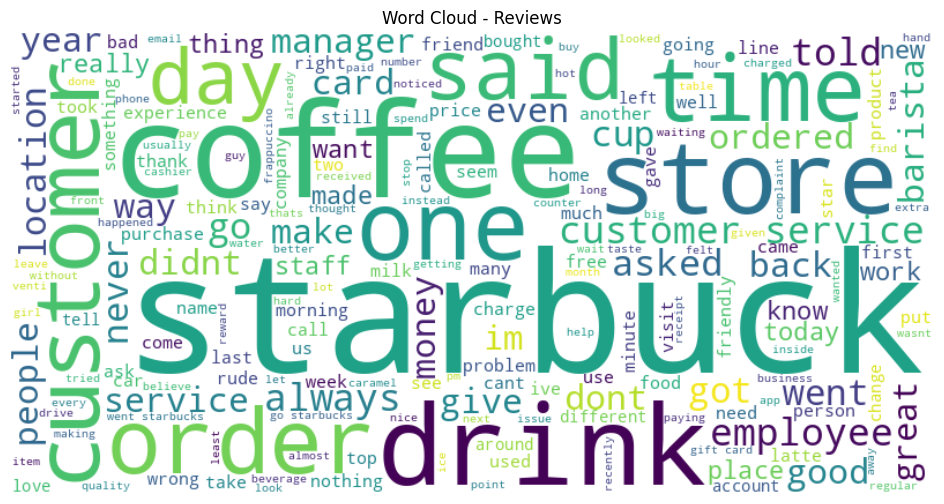

In [120]:
#Génération de word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['clean_Review']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews')
plt.show()

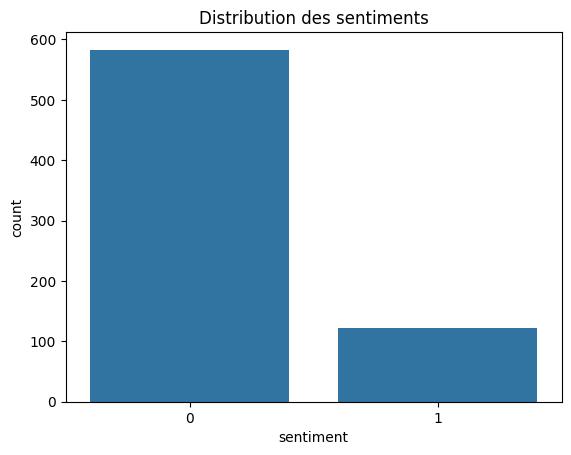

In [121]:
#Distribution des classes
sns.countplot(x='sentiment', data=data)
plt.title("Distribution des sentiments")
plt.show()


Nous constatons une nette désequilibre des classes(class imbalance). Nous priorisons donc, au lieu de la précision, des metriques comme
Recall
F1-score
AUC-ROC
Matrice de confusion. Et en fin nous utiliserons le parametre ***class_weight='balanced*** pour donner plus de pondération à la classe minoritaire

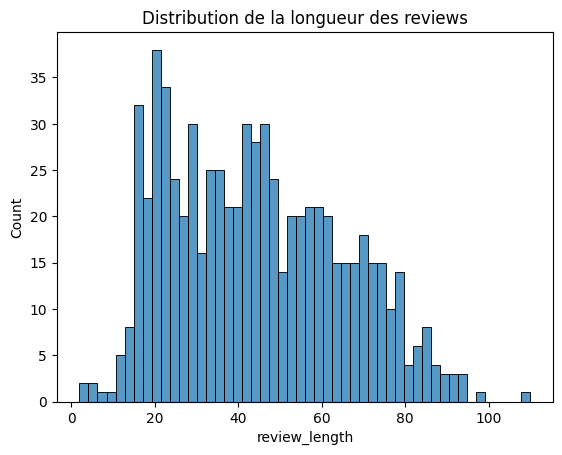

In [122]:
#Longueur des reviews
data['review_length'] = data['clean_Review'].apply(lambda x: len(x.split()))

sns.histplot(data['review_length'], bins=50)
plt.title("Distribution de la longueur des reviews")
plt.show()


***6. Vectorisation TF-IDF***

In [123]:
# Vectorisation avec TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = tfidf.fit_transform(data['clean_Review'])
y = data['sentiment']


In [124]:
#Taille du vocabulaire
print(len(tfidf.vocabulary_))

5000


***7. Entrainement et teste***

In [125]:
# Division en données d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Logistic Regression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       117
           1       0.00      0.00      0.00        24

    accuracy                           0.83       141
   macro avg       0.41      0.50      0.45       141
weighted avg       0.69      0.83      0.75       141



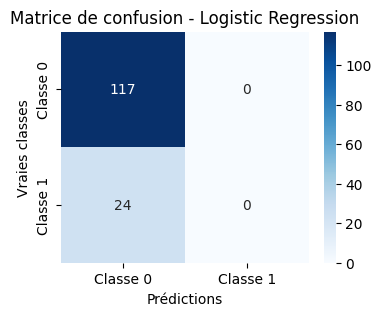


Naive Bayes
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       117
           1       0.00      0.00      0.00        24

    accuracy                           0.83       141
   macro avg       0.41      0.50      0.45       141
weighted avg       0.69      0.83      0.75       141



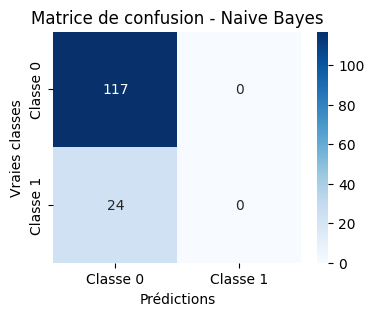


Linear SVM
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       117
           1       0.83      0.42      0.56        24

    accuracy                           0.89       141
   macro avg       0.86      0.70      0.75       141
weighted avg       0.88      0.89      0.87       141



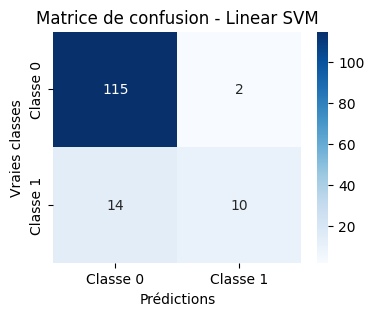

In [126]:
#Entraînement
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Affichage graphique
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Classe 0', 'Classe 1'],
        yticklabels=['Classe 0', 'Classe 1']
    )
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.show()


A cause de la forte assymétrie entre les classes, Logistic Regression et Naive Bayes ont tendance à uniquement prédire la classe dominante(Négatif). Nous pouvons corriger cela en introduisant le parametre ***class_weight='balanced***


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       117
           1       0.68      0.54      0.60        24

    accuracy                           0.88       141
   macro avg       0.80      0.75      0.77       141
weighted avg       0.87      0.88      0.87       141



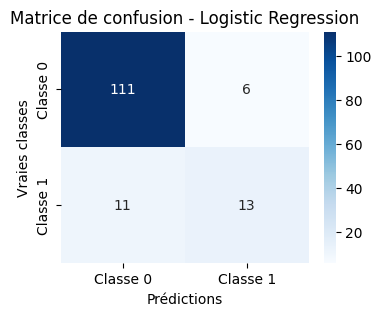


Naive Bayes
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       117
           1       0.00      0.00      0.00        24

    accuracy                           0.83       141
   macro avg       0.41      0.50      0.45       141
weighted avg       0.69      0.83      0.75       141



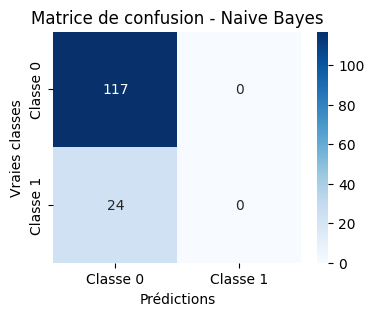


Linear SVM
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       117
           1       0.67      0.50      0.57        24

    accuracy                           0.87       141
   macro avg       0.78      0.72      0.75       141
weighted avg       0.86      0.87      0.86       141



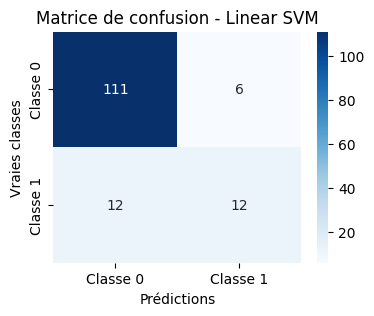

In [127]:
#Entraînement avec class_weight='balanced
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Affichage graphique
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Classe 0', 'Classe 1'],
        yticklabels=['Classe 0', 'Classe 1']
    )
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.show()

## Conclusion

Dans ce projet, plusieurs modèles d'apprentissage automatique ont été évalués pour la classification des sentiments dans les avis sur Starbucks.

La régression logistique et le SVM linéaire ont obtenu de meilleures performances par rapport au Naive Bayes, notamment en termes de rappel et de F1-score pour la classe minoritaire.

Cependant, l'ensemble de données est fortement déséquilibré, ce qui impacte négativement la détection des avis positifs. Malgré l'utilisation du pondération des classes, les erreurs de classification restent une limitation.

Les améliorations futures pourraient inclure :
- L'utilisation de techniques plus avancées comme SMOTE
- L'essai de modèles d'apprentissage profond (LSTM, BERT)
- L'extension de l'ensemble de données avec plus d'avis annotés